In [ ]:
!pip install pm4py==2.7.5

In [6]:
import pandas as pd
import random
import pm4py
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# Shopping history

Fix a set of four activities $\{a,b,c,d\}$ such that
  - $a$ means "Login"
  - $b$ means "Add an item to cart"
  - $c$ means "Remove an item from cart"
  - $d$ means "Checkout"


(2 points) Write a function to generate an event log (as a Pandas DataFrame) containing 500 _random_ cases obeying the following rules:

  1. A case starts with "Login" and ends with "Checkout"
  2. No logins and checkouts can happen in between
  3. An indefinite number of items can be added to and removed from cart
  4. It is not allowed to remove items from an empty cart

Examples of valid case variants include $ad$, $abd$, $abbcd$, $abcbd$, $abbccd$, etc.

(2 points) Use PM4PY to learn a process map and a process tree from your random log. You may freely use abstraction etc. to improve the qualify of your models.
(Please keep the models when uploading your solution sheet.)


### Shopping history Q1

In [34]:
event_log = pd.DataFrame()
current_time = datetime.now()

def generate_event_log(id, current_time):
  activities = ['b', 'c']
  log = []

  i = 1
  countB = 0
  countC = 0
  num = random.randint(2, 20)
  while i <= num:
    if (i == 1):
      log.append((id, 'a', current_time))
    elif (i == num):
      log.append((id, 'd', current_time))
    else:
      if (countB <= countC):
        log.append((id, 'b', current_time))
        countB += 1
      else:
        # Randomly select 'b' or 'c'
        random_activity = random.choice(activities)
        log.append((id, random_activity, current_time))
        if random_activity == 'b':
          countB += 1
        else:
          countC += 1
    i += 1
    current_time += timedelta(minutes=1)

  return pd.DataFrame({'Id':[x[0] for x in log], 'Event': [x[1] for x in log], 'Time': [x[2] for x in log]})

# 題目規定
num = 500

# Generate the event log
for id in range(num):
  event_log = event_log.append(generate_event_log(int(id), current_time))

event_log['Time'] = pd.to_datetime(event_log['Time'], format='%M:%S')

# Display the first few rows of the event log
event_log

,Id,Event,Time
0,0,a,2023-10-15 14:07:12.599231
1,0,b,2023-10-15 14:08:12.599231
2,0,d,2023-10-15 14:09:12.599231
0,1,a,2023-10-15 14:07:12.599231
1,1,b,2023-10-15 14:08:12.599231
...,...,...,...
1,499,b,2023-10-15 14:08:12.599231
2,499,b,2023-10-15 14:09:12.599231
3,499,c,2023-10-15 14:10:12.599231
4,499,b,2023-10-15 14:11:12.599231


### Shopping history Q2

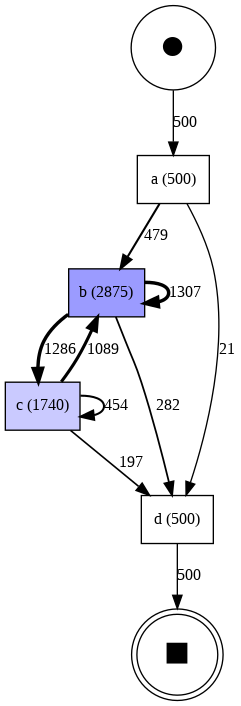

In [42]:
df = pm4py.format_dataframe(event_log, case_id='Id',activity_key='Event', timestamp_key='Time')

dfg, initial_activities, final_activities = pm4py.discover_dfg(df)

pm4py.view_dfg(dfg, initial_activities, final_activities)

In [43]:
initial_activities

{'a': 500}

In [44]:
final_activities

{'d': 500}

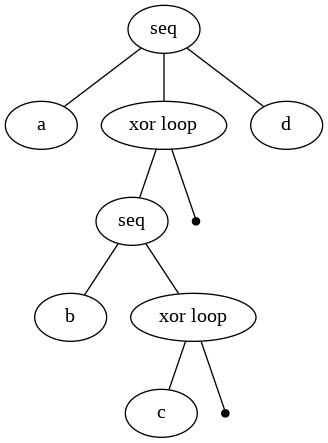

In [45]:
tree = pm4py.discover_process_tree_inductive(df, 0.8)
pm4py.view_process_tree(tree)

# Patient treatment

In this exercise, we will perform a simple variant analysis of the SEPSIS log in Assignment 1.

1. (2 points) Generate two process variants of the log such that one vairant has Age up to 30, and the other variant has Age equal to 65 or above. (Hint: Use Pandas and/or PM4PY to generate two logs *SEPSIS_young* and *SEPSIS_old* according to the conditions. These logs should have 376 and 11344 rows, respectively.)

2. (2 points) Describe at least three major behavioral/performance differences between *SEPSIS_young* and *SEPSIS_old*. (Hint: You may abstract the logs a bit to focus on more signifcant differences.)

3. (2 points) Consider the cases starting with "ER Registration" and ending with "Release A". There is a gap between the average duration times of these cases in *SEPSIS_young* and *SEPSIS_old*. Try to identify the case variant that has the most significant impact on the delay. What's the average duration time after the cases associated with this case variant are removed?


(Note: You may refer to [this paper](https://www.sciencedirect.com/science/article/pii/S2772442523000540) to gain more insights into the SEPSIS dataset.)


In [46]:
!pip install pm4py==2.7.5

In [47]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt
import requests
r = requests.get("https://github.com/chihduo/pmlab/raw/main/2023/script/utils.py")
with open("utils.py", 'w') as f:
  f.write(r.text)
import utils

In [48]:
df = pd.read_csv("https://github.com/chihduo/pmlab/raw/main/2023/data/sepsis.csv", sep = ',')
df.head(5)

,Case ID,Activity,Complete Timestamp,Variant,Variant index,Age,CRP,Diagnose,DiagnosticArtAstrup,DiagnosticBlood,...,LacticAcid,Leucocytes,Oligurie,SIRSCritHeartRate,SIRSCritLeucos,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore,lifecycle:transition,org:group
0,A,ER Registration,2014/10/22 12:15:41.000,Variant 63,63,85.0,NaN,A,True,True,...,NaN,NaN,False,True,False,True,True,True,complete,A
1,A,Leucocytes,2014/10/22 12:27:00.000,Variant 63,63,NaN,NaN,NaN,NaN,NaN,...,NaN,9.6,NaN,NaN,NaN,NaN,NaN,NaN,complete,B
2,A,CRP,2014/10/22 12:27:00.000,Variant 63,63,NaN,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,complete,B
3,A,LacticAcid,2014/10/22 12:27:00.000,Variant 63,63,NaN,NaN,NaN,NaN,NaN,...,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,complete,B
4,A,ER Triage,2014/10/22 12:33:37.000,Variant 63,63,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,complete,C


In [54]:
df["Complete Timestamp"] = pd.to_datetime(df["Complete Timestamp"])
df = pm4py.format_dataframe(df, case_id='Case ID',activity_key='Activity', timestamp_key='Complete Timestamp')
df

,Case ID,Activity,Complete Timestamp,Variant,Variant index,Age,CRP,Diagnose,DiagnosticArtAstrup,DiagnosticBlood,...,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore,lifecycle:transition,org:group,@@index,@@case_index,case:concept:name,concept:name,time:timestamp
0,A,ER Registration,2014-10-22 12:15:41,Variant 63,63,85.0,NaN,A,True,True,...,True,True,True,complete,A,0,0,A,ER Registration,2014-10-22 12:15:41
1,A,Leucocytes,2014-10-22 12:27:00,Variant 63,63,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,1,0,A,Leucocytes,2014-10-22 12:27:00
2,A,CRP,2014-10-22 12:27:00,Variant 63,63,NaN,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,2,0,A,CRP,2014-10-22 12:27:00
3,A,LacticAcid,2014-10-22 12:27:00,Variant 63,63,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,3,0,A,LacticAcid,2014-10-22 12:27:00
4,A,ER Triage,2014-10-22 12:33:37,Variant 63,63,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,C,4,0,A,ER Triage,2014-10-22 12:33:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15185,ZZ,CRP,2014-11-14 08:00:00,Variant 61,61,NaN,146.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,15185,1048,ZZ,CRP,2014-11-14 08:00:00
15186,ZZ,Leucocytes,2014-11-14 08:00:00,Variant 61,61,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,15186,1048,ZZ,Leucocytes,2014-11-14 08:00:00
15187,ZZ,Leucocytes,2014-11-16 08:00:00,Variant 61,61,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,15187,1048,ZZ,Leucocytes,2014-11-16 08:00:00
15188,ZZ,CRP,2014-11-16 08:00:00,Variant 61,61,NaN,96.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,15188,1048,ZZ,CRP,2014-11-16 08:00:00


### Patient treatment Q1
(2 points) Generate two process variants of the log such that one vairant has Age up to 30, and the other variant has Age equal to 65 or above. (Hint: Use Pandas and/or PM4PY to generate two logs SEPSIS_young and SEPSIS_old according to the conditions. These logs should have 376 and 11344 rows, respectively.)

In [63]:
# Sort by index
df = df.sort_index()

# fulfill the age
df['Age'] = df['Age'].fillna(method='ffill')
df.head(5)

,Case ID,Activity,Complete Timestamp,Variant,Variant index,Age,CRP,Diagnose,DiagnosticArtAstrup,DiagnosticBlood,...,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore,lifecycle:transition,org:group,@@index,@@case_index,case:concept:name,concept:name,time:timestamp
0,A,ER Registration,2014-10-22 12:15:41,Variant 63,63,85.0,NaN,A,True,True,...,True,True,True,complete,A,0,0,A,ER Registration,2014-10-22 12:15:41
1,A,Leucocytes,2014-10-22 12:27:00,Variant 63,63,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,1,0,A,Leucocytes,2014-10-22 12:27:00
2,A,CRP,2014-10-22 12:27:00,Variant 63,63,85.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,2,0,A,CRP,2014-10-22 12:27:00
3,A,LacticAcid,2014-10-22 12:27:00,Variant 63,63,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,3,0,A,LacticAcid,2014-10-22 12:27:00
4,A,ER Triage,2014-10-22 12:33:37,Variant 63,63,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,C,4,0,A,ER Triage,2014-10-22 12:33:37


In [64]:
SEPSIS_young = df[df['Age'] <= 30].copy()
SEPSIS_young.head(5)

,Case ID,Activity,Complete Timestamp,Variant,Variant index,Age,CRP,Diagnose,DiagnosticArtAstrup,DiagnosticBlood,...,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore,lifecycle:transition,org:group,@@index,@@case_index,case:concept:name,concept:name,time:timestamp
559,BAA,ER Registration,2014-12-17 21:21:03,Variant 34,34,25.0,NaN,C,False,True,...,False,True,True,complete,A,559,43,BAA,ER Registration,2014-12-17 21:21:03
560,BAA,ER Triage,2014-12-17 21:30:48,Variant 34,34,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,C,560,43,BAA,ER Triage,2014-12-17 21:30:48
561,BAA,ER Sepsis Triage,2014-12-17 21:31:03,Variant 34,34,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,A,561,43,BAA,ER Sepsis Triage,2014-12-17 21:31:03
562,BAA,Leucocytes,2014-12-17 21:41:00,Variant 34,34,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,562,43,BAA,Leucocytes,2014-12-17 21:41:00
563,BAA,CRP,2014-12-17 21:41:00,Variant 34,34,25.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,563,43,BAA,CRP,2014-12-17 21:41:00


In [65]:
SEPSIS_old = df[df['Age'] >= 65].copy()
SEPSIS_old.head(5)

,Case ID,Activity,Complete Timestamp,Variant,Variant index,Age,CRP,Diagnose,DiagnosticArtAstrup,DiagnosticBlood,...,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore,lifecycle:transition,org:group,@@index,@@case_index,case:concept:name,concept:name,time:timestamp
0,A,ER Registration,2014-10-22 12:15:41,Variant 63,63,85.0,NaN,A,True,True,...,True,True,True,complete,A,0,0,A,ER Registration,2014-10-22 12:15:41
1,A,Leucocytes,2014-10-22 12:27:00,Variant 63,63,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,1,0,A,Leucocytes,2014-10-22 12:27:00
2,A,CRP,2014-10-22 12:27:00,Variant 63,63,85.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,2,0,A,CRP,2014-10-22 12:27:00
3,A,LacticAcid,2014-10-22 12:27:00,Variant 63,63,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,3,0,A,LacticAcid,2014-10-22 12:27:00
4,A,ER Triage,2014-10-22 12:33:37,Variant 63,63,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,C,4,0,A,ER Triage,2014-10-22 12:33:37


In [69]:
print(len(SEPSIS_young), len(SEPSIS_old))


376 11344


### Patient treatment Q2
(2 points) Describe at least three major behavioral/performance differences between SEPSIS_young and SEPSIS_old. (Hint: You may abstract the logs a bit to focus on more signifcant differences.)
</br>
</br>

#### ANS
1.   SEPSIS_young's initial_activities are relatively simple, with only ER Registration and CRP.
2.   In terms of results, SEPSIS_young only has Release A, while SEPSIS_old has Release A to Release E.
3.   When k = 6, the log number of SEPSIS_old is almost the same as that of SEPSIS_young. It can be seen that SEPSIS_old has a larger number of activities for each variant.



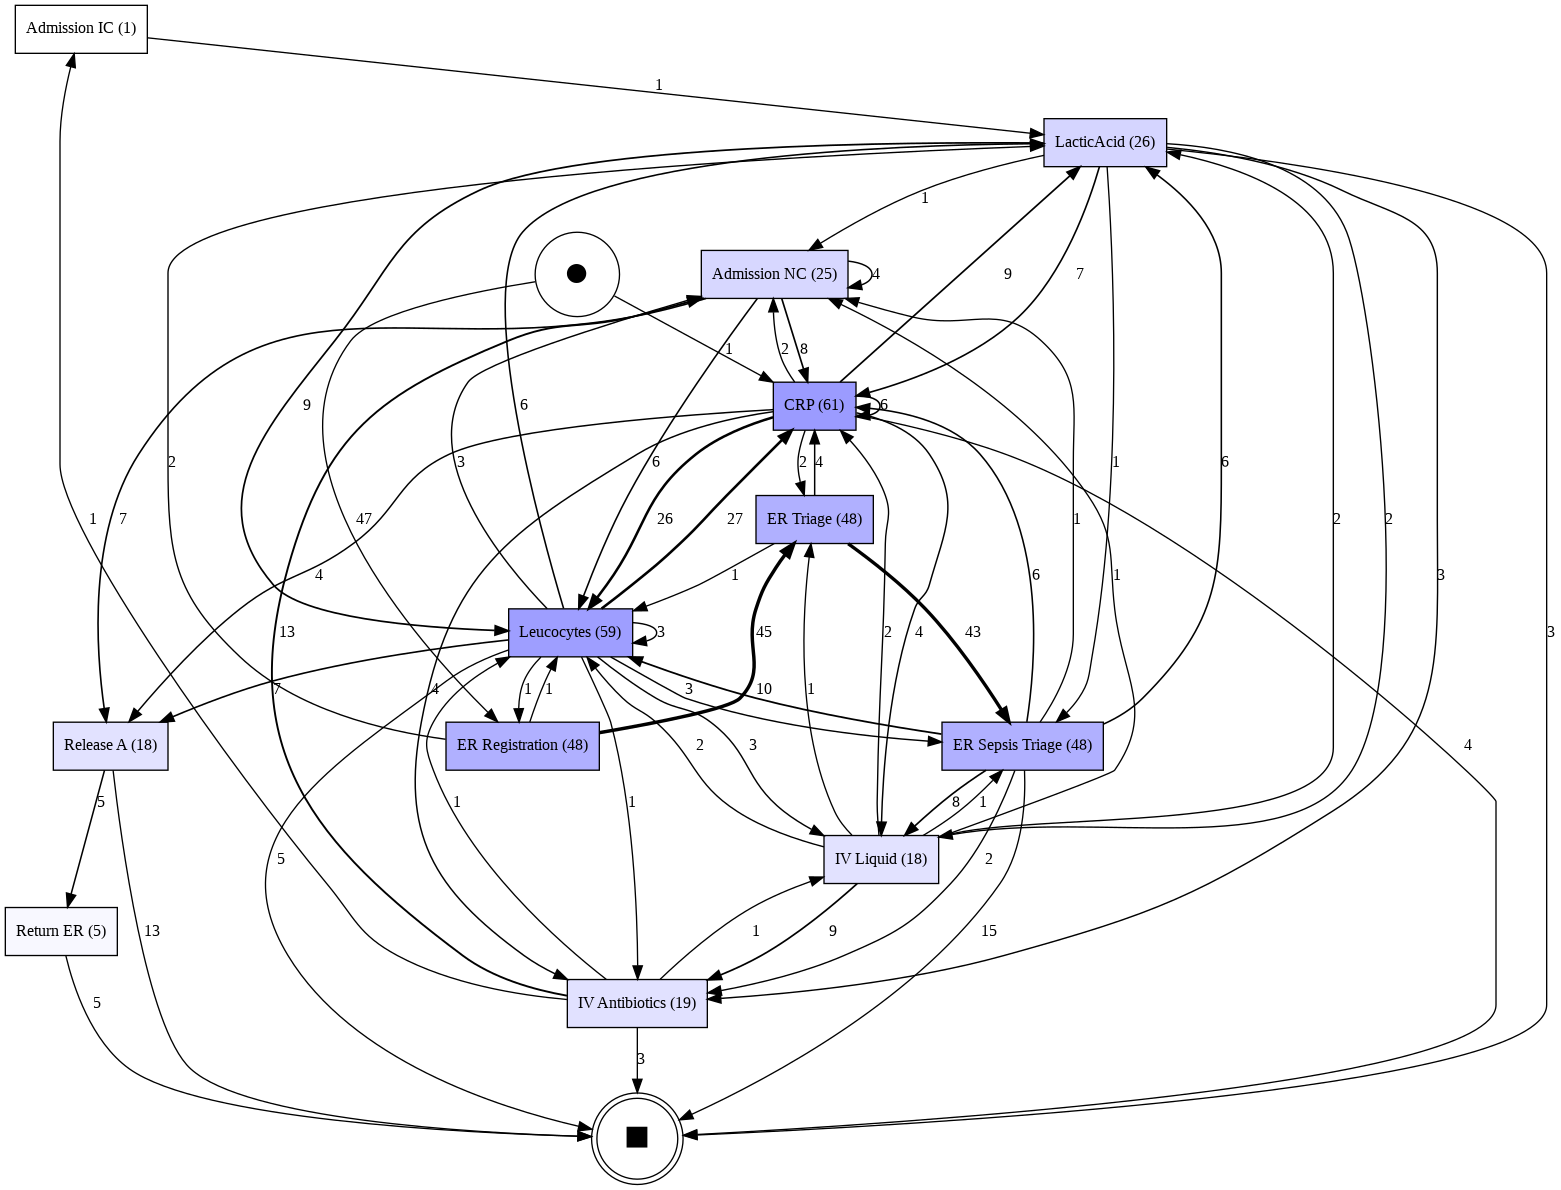

In [72]:
df_young = pm4py.format_dataframe(SEPSIS_young, case_id="Case ID",activity_key="Activity", timestamp_key="Complete Timestamp")

dfg, initial_activities, final_activities = pm4py.discover_dfg(df_young)

pm4py.view_dfg(dfg, initial_activities, final_activities)

In [73]:
initial_activities

{'ER Registration': 47, 'CRP': 1}

In [74]:
final_activities

{'ER Sepsis Triage': 15,
 'Release A': 13,
 'Return ER': 5,
 'Leucocytes': 5,
 'CRP': 4,
 'LacticAcid': 3,
 'IV Antibiotics': 3}

In [86]:
df_old = pm4py.format_dataframe(SEPSIS_old, case_id="Case ID",activity_key="Activity", timestamp_key="Complete Timestamp")

df_old


,Case ID,Activity,Complete Timestamp,Variant,Variant index,Age,CRP,Diagnose,DiagnosticArtAstrup,DiagnosticBlood,...,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore,lifecycle:transition,org:group,@@index,@@case_index,case:concept:name,concept:name,time:timestamp
0,A,ER Registration,2014-10-22 12:15:41,Variant 63,63,85.0,NaN,A,True,True,...,True,True,True,complete,A,0,0,A,ER Registration,2014-10-22 12:15:41
1,A,Leucocytes,2014-10-22 12:27:00,Variant 63,63,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,1,0,A,Leucocytes,2014-10-22 12:27:00
2,A,CRP,2014-10-22 12:27:00,Variant 63,63,85.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,2,0,A,CRP,2014-10-22 12:27:00
3,A,LacticAcid,2014-10-22 12:27:00,Variant 63,63,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,3,0,A,LacticAcid,2014-10-22 12:27:00
4,A,ER Triage,2014-10-22 12:33:37,Variant 63,63,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,C,4,0,A,ER Triage,2014-10-22 12:33:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11339,ZZ,CRP,2014-11-14 08:00:00,Variant 61,61,70.0,146.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,11339,754,ZZ,CRP,2014-11-14 08:00:00
11340,ZZ,Leucocytes,2014-11-14 08:00:00,Variant 61,61,70.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,11340,754,ZZ,Leucocytes,2014-11-14 08:00:00
11341,ZZ,Leucocytes,2014-11-16 08:00:00,Variant 61,61,70.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,11341,754,ZZ,Leucocytes,2014-11-16 08:00:00
11342,ZZ,CRP,2014-11-16 08:00:00,Variant 61,61,70.0,96.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,11342,754,ZZ,CRP,2014-11-16 08:00:00


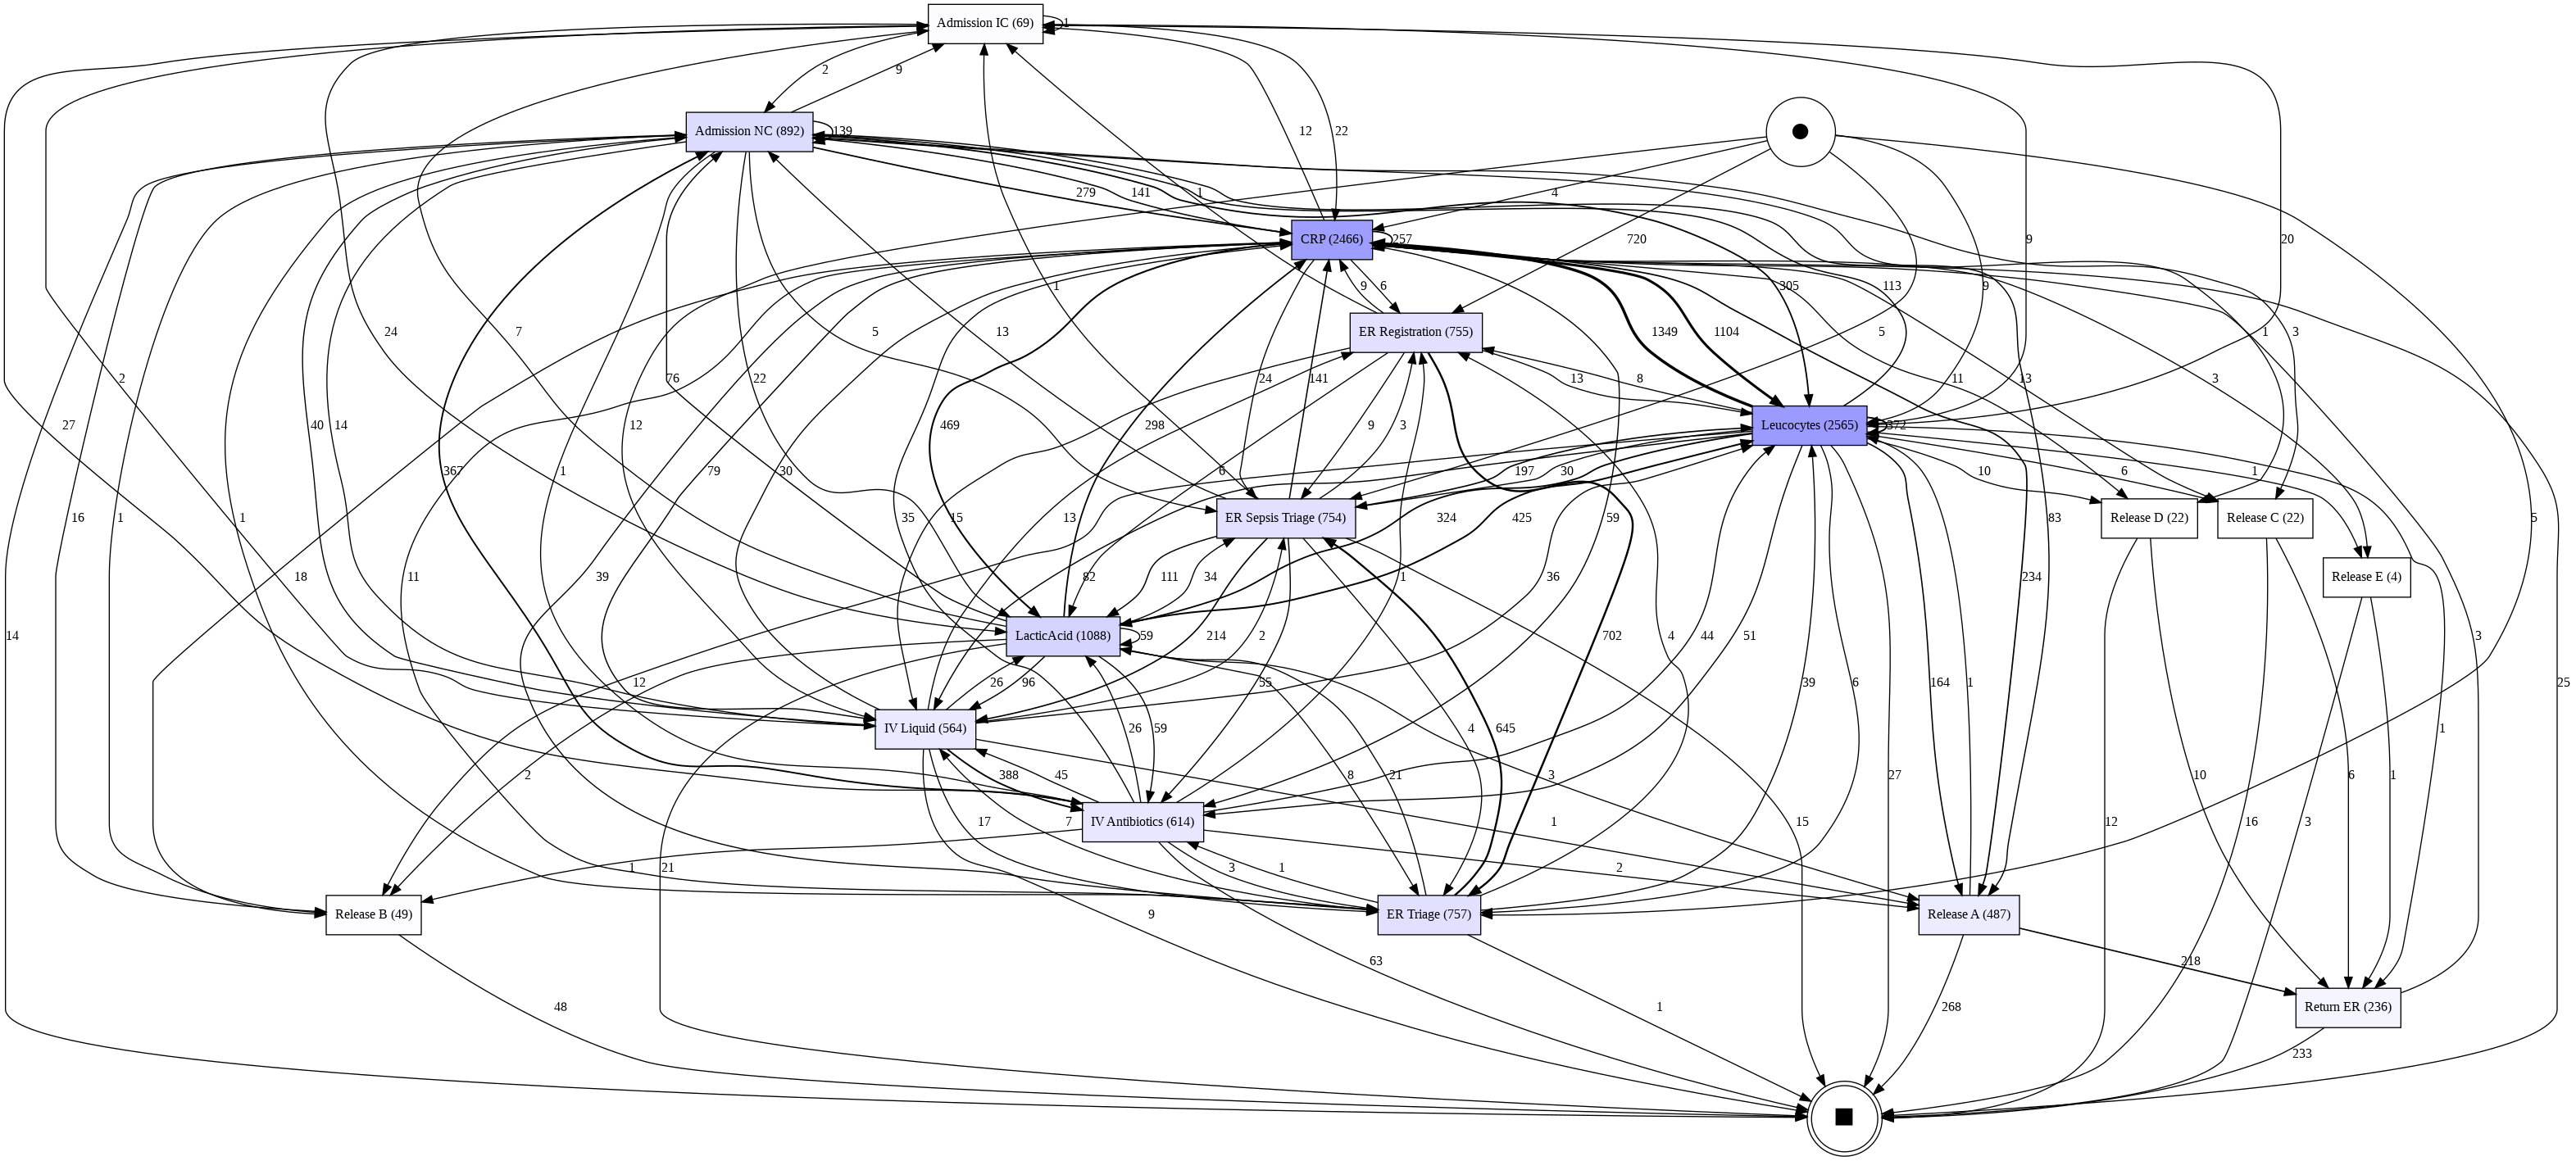

In [87]:
dfg, initial_activities, final_activities = pm4py.discover_dfg(df_old)

pm4py.view_dfg(dfg, initial_activities, final_activities)

In [88]:
initial_activities

{'ER Registration': 720,
 'IV Liquid': 12,
 'Leucocytes': 9,
 'ER Sepsis Triage': 5,
 'ER Triage': 5,
 'CRP': 4}

In [89]:
final_activities

{'Release A': 268,
 'Return ER': 233,
 'IV Antibiotics': 63,
 'Release B': 48,
 'Leucocytes': 27,
 'CRP': 25,
 'LacticAcid': 21,
 'Release C': 16,
 'ER Sepsis Triage': 15,
 'Admission NC': 14,
 'Release D': 12,
 'IV Liquid': 9,
 'Release E': 3,
 'ER Triage': 1}

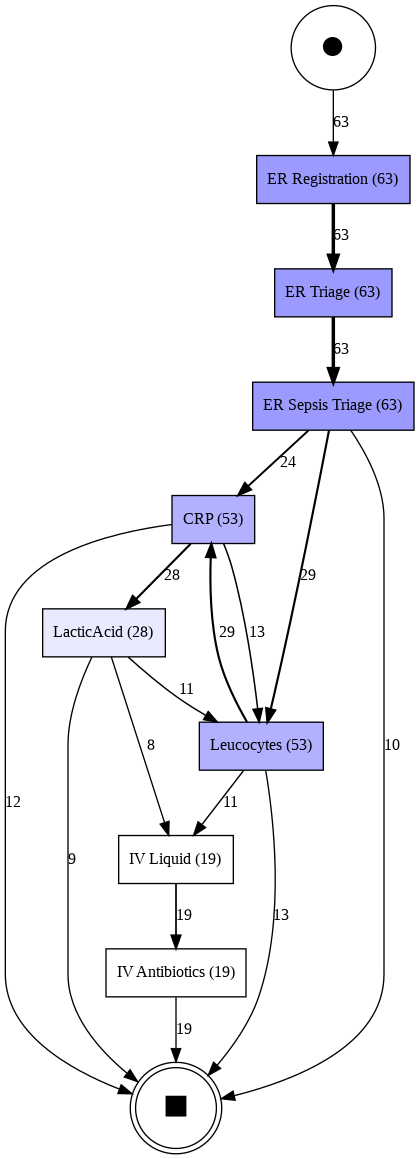

In [90]:
# 讓案例數量差不多
k = 6
df_old = pm4py.filtering.filter_variants_top_k(df_old, k)
dfg, initial_activities, final_activities = pm4py.discover_dfg(df_old)

pm4py.view_dfg(dfg, initial_activities, final_activities)

### Patient treatment Q3
(2 points) Consider the cases starting with "ER Registration" and ending with "Release A". There is a gap between the average duration times of these cases in SEPSIS_young and SEPSIS_old. Try to identify the case variant that has the most significant impact on the delay. What's the average duration time after the cases associated with this case variant are removed?
</br>
</br>
#### ANS
After removal, SEPSIS_old was greatly affected. SEPSIS_young was only 3 hours behind, and SEPSIS_old was 29 hours behind.

In [113]:
# 按 Case ID 和 Complete Timestamp 排序
SEPSIS_young = SEPSIS_young.sort_values(by=['Case ID', 'Complete Timestamp'])

# 首先，我们需要根据 "ER Registration" 和 "Release A" 进行筛选
er_registration_cases = SEPSIS_young[SEPSIS_young['Activity'] == 'ER Registration']
release_a_cases = SEPSIS_young[SEPSIS_young['Activity'] == 'Release A']

# 确保每个案例以 "ER Registration" 开头并以 "Release A" 结尾
valid_case_ids = []
for case_id, group in SEPSIS_young.groupby('Case ID'):
  #確認第一個是 ER Registration
    if er_registration_cases[er_registration_cases['Case ID'] == case_id].index.max() == group.index.min():
        #確認最後一個是 Release A
      if release_a_cases[release_a_cases['Case ID'] == case_id].index.max() == group.index.max():
          valid_case_ids.append(case_id)

# 最后，我们可以根据这些 Case ID 过滤出符合条件的案例
filtered_young_cases = SEPSIS_young[SEPSIS_young['Case ID'].isin(valid_case_ids)]

# 现在，filtered_young_cases 就包含了以 "ER Registration" 开始并以 "Release A" 结束的所有案例的信息
filtered_young_cases

,Case ID,Activity,Complete Timestamp,Variant,Variant index,Age,CRP,Diagnose,DiagnosticArtAstrup,DiagnosticBlood,...,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore,lifecycle:transition,org:group,@@index,@@case_index,case:concept:name,concept:name,time:timestamp
559,BAA,ER Registration,2014-12-17 21:21:03,Variant 34,34,25.0,NaN,C,False,True,...,False,True,True,complete,A,559,43,BAA,ER Registration,2014-12-17 21:21:03
560,BAA,ER Triage,2014-12-17 21:30:48,Variant 34,34,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,C,560,43,BAA,ER Triage,2014-12-17 21:30:48
561,BAA,ER Sepsis Triage,2014-12-17 21:31:03,Variant 34,34,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,A,561,43,BAA,ER Sepsis Triage,2014-12-17 21:31:03
562,BAA,Leucocytes,2014-12-17 21:41:00,Variant 34,34,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,562,43,BAA,Leucocytes,2014-12-17 21:41:00
563,BAA,CRP,2014-12-17 21:41:00,Variant 34,34,25.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,563,43,BAA,CRP,2014-12-17 21:41:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11316,TH,Admission NC,2014-09-07 07:07:23,Variant 221,221,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,O,11316,785,TH,Admission NC,2014-09-07 07:07:23
11317,TH,CRP,2014-09-08 09:00:00,Variant 221,221,20.0,159.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,11317,785,TH,CRP,2014-09-08 09:00:00
11318,TH,LacticAcid,2014-09-08 09:00:00,Variant 221,221,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,11318,785,TH,LacticAcid,2014-09-08 09:00:00
11319,TH,CRP,2014-09-09 09:00:00,Variant 221,221,20.0,91.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,11319,785,TH,CRP,2014-09-09 09:00:00


In [122]:
# 按 Case ID 和 Complete Timestamp 排序
SEPSIS_old = SEPSIS_old.sort_values(by=['Case ID', 'Complete Timestamp'])

# 首先，我们需要根据 "ER Registration" 和 "Release A" 进行筛选
er_registration_cases = SEPSIS_old[SEPSIS_old['Activity'] == 'ER Registration']
release_a_cases = SEPSIS_old[SEPSIS_old['Activity'] == 'Release A']

# 确保每个案例以 "ER Registration" 开头并以 "Release A" 结尾
valid_case_ids = []
for case_id, group in SEPSIS_old.groupby('Case ID'):
  #確認第一個是 ER Registration
    if er_registration_cases[er_registration_cases['Case ID'] == case_id].index.max() == group.index.min():
        #確認最後一個是 Release A
      if release_a_cases[release_a_cases['Case ID'] == case_id].index.max() == group.index.max():
          valid_case_ids.append(case_id)

# 最后，我们可以根据这些 Case ID 过滤出符合条件的案例
filtered_old_cases = SEPSIS_old[SEPSIS_old['Case ID'].isin(valid_case_ids)]

# 现在，filtered_old_cases 就包含了以 "ER Registration" 开始并以 "Release A" 结束的所有案例的信息
filtered_old_cases

,Case ID,Activity,Complete Timestamp,Variant,Variant index,Age,CRP,Diagnose,DiagnosticArtAstrup,DiagnosticBlood,...,SIRSCritTachypnea,SIRSCritTemperature,SIRSCriteria2OrMore,lifecycle:transition,org:group,@@index,@@case_index,case:concept:name,concept:name,time:timestamp
0,A,ER Registration,2014-10-22 12:15:41,Variant 63,63,85.0,NaN,A,True,True,...,True,True,True,complete,A,0,0,A,ER Registration,2014-10-22 12:15:41
1,A,Leucocytes,2014-10-22 12:27:00,Variant 63,63,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,1,0,A,Leucocytes,2014-10-22 12:27:00
2,A,CRP,2014-10-22 12:27:00,Variant 63,63,85.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,2,0,A,CRP,2014-10-22 12:27:00
3,A,LacticAcid,2014-10-22 12:27:00,Variant 63,63,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,3,0,A,LacticAcid,2014-10-22 12:27:00
4,A,ER Triage,2014-10-22 12:33:37,Variant 63,63,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,C,4,0,A,ER Triage,2014-10-22 12:33:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15185,ZZ,CRP,2014-11-14 08:00:00,Variant 61,61,70.0,146.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,15185,1048,ZZ,CRP,2014-11-14 08:00:00
15186,ZZ,Leucocytes,2014-11-14 08:00:00,Variant 61,61,70.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,15186,1048,ZZ,Leucocytes,2014-11-14 08:00:00
15187,ZZ,Leucocytes,2014-11-16 08:00:00,Variant 61,61,70.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,15187,1048,ZZ,Leucocytes,2014-11-16 08:00:00
15188,ZZ,CRP,2014-11-16 08:00:00,Variant 61,61,70.0,96.0,NaN,NaN,NaN,...,NaN,NaN,NaN,complete,B,15188,1048,ZZ,CRP,2014-11-16 08:00:00


In [131]:
young_cucle_time_df = pd.DataFrame()

young_cucle_time_df['Case ID'] = filtered_young_cases['Case ID'].unique()
cucle_time_start = filtered_young_cases.groupby('Case ID')['Complete Timestamp'].min().reset_index()
cucle_time_end = filtered_young_cases.groupby('Case ID')['Complete Timestamp'].max().reset_index()

young_cucle_time_df = young_cucle_time_df.merge(cucle_time_start, on=['Case ID'], how='inner')
young_cucle_time_df = young_cucle_time_df.merge(cucle_time_end, on=['Case ID'], how='inner')
young_cucle_time_df['Cycle Time'] = young_cucle_time_df['Complete Timestamp_y'] - young_cucle_time_df['Complete Timestamp_x']

young_cucle_time_df.sort_values(by='Cycle Time', ascending=False)

,Case ID,Complete Timestamp_x,Complete Timestamp_y,Cycle Time
4,EX,2014-01-05 21:36:30,2014-01-23 17:29:00,17 days 19:52:30
10,QY,2014-09-08 16:26:08,2014-09-16 11:30:00,7 days 19:03:52
2,CV,2014-04-17 22:30:41,2014-04-21 10:45:00,3 days 12:14:19
7,HX,2014-11-29 09:01:38,2014-12-02 18:00:00,3 days 08:58:22
9,NDA,2014-01-30 13:06:08,2014-02-02 20:00:00,3 days 06:53:52
8,KBA,2014-07-29 18:11:20,2014-08-01 18:00:00,2 days 23:48:40
3,EBA,2015-02-02 16:30:18,2015-02-05 14:30:00,2 days 21:59:42
1,BNA,2014-09-06 16:22:52,2014-09-09 13:35:00,2 days 21:12:08
0,BAA,2014-12-17 21:21:03,2014-12-20 13:00:00,2 days 15:38:57
11,TH,2014-09-07 04:23:50,2014-09-09 15:00:00,2 days 10:36:10


In [130]:
## 2. What is the longest cycle time? (2 points)
old_cucle_time_df = pd.DataFrame()

old_cucle_time_df['Case ID'] = filtered_old_cases['Case ID'].unique()
cucle_time_start = filtered_old_cases.groupby('Case ID')['Complete Timestamp'].min().reset_index()
cucle_time_end = filtered_old_cases.groupby('Case ID')['Complete Timestamp'].max().reset_index()

old_cucle_time_df = old_cucle_time_df.merge(cucle_time_start, on=['Case ID'], how='inner')
old_cucle_time_df = old_cucle_time_df.merge(cucle_time_end, on=['Case ID'], how='inner')
old_cucle_time_df['Cycle Time'] = old_cucle_time_df['Complete Timestamp_y'] - old_cucle_time_df['Complete Timestamp_x']

old_cucle_time_df.sort_values(by='Cycle Time', ascending=False)

,Case ID,Complete Timestamp_x,Complete Timestamp_y,Cycle Time
135,NEA,2014-03-15 09:41:08,2014-04-23 13:00:00,39 days 03:18:52
104,JS,2014-03-27 18:12:12,2014-05-02 12:45:00,35 days 18:32:48
60,FM,2014-07-21 13:24:06,2014-08-23 11:45:00,32 days 22:20:54
93,IM,2014-10-31 10:04:50,2014-12-01 13:30:00,31 days 03:25:10
242,YX,2014-04-29 20:24:22,2014-05-29 14:15:00,29 days 17:50:38
...,...,...,...,...
125,LMA,2014-09-12 11:50:45,2014-09-13 16:30:00,1 days 04:39:15
177,RM,2014-04-16 16:34:56,2014-04-17 20:00:00,1 days 03:25:04
7,ANA,2014-05-16 18:11:45,2014-05-17 17:00:00,0 days 22:48:15
101,JL,2014-03-25 13:54:19,2014-03-26 10:00:00,0 days 20:05:41


In [141]:
print("average duration time before remove:", old_cucle_time_df['Cycle Time'].mean(), young_cucle_time_df['Cycle Time'].mean())

average duration time before remove: 7 days 02:21:52.332046332 4 days 09:42:44.583333333


In [136]:
# 找到最大的 Cycle Time 值
max_young_cycle_time = young_cucle_time_df['Cycle Time'].max()

# 根据条件筛选出不是最大值的行
filtered_young_cucle_time_df = young_cucle_time_df[young_cucle_time_df['Cycle Time'] != max_young_cycle_time]
filtered_young_cucle_time_df.sort_values(by='Cycle Time', ascending=False)

,Case ID,Complete Timestamp_x,Complete Timestamp_y,Cycle Time
10,QY,2014-09-08 16:26:08,2014-09-16 11:30:00,7 days 19:03:52
2,CV,2014-04-17 22:30:41,2014-04-21 10:45:00,3 days 12:14:19
7,HX,2014-11-29 09:01:38,2014-12-02 18:00:00,3 days 08:58:22
9,NDA,2014-01-30 13:06:08,2014-02-02 20:00:00,3 days 06:53:52
8,KBA,2014-07-29 18:11:20,2014-08-01 18:00:00,2 days 23:48:40
3,EBA,2015-02-02 16:30:18,2015-02-05 14:30:00,2 days 21:59:42
1,BNA,2014-09-06 16:22:52,2014-09-09 13:35:00,2 days 21:12:08
0,BAA,2014-12-17 21:21:03,2014-12-20 13:00:00,2 days 15:38:57
11,TH,2014-09-07 04:23:50,2014-09-09 15:00:00,2 days 10:36:10
6,GFA,2014-05-02 23:39:29,2014-05-04 14:00:00,1 days 14:20:31


In [137]:
# 找到最大的 Cycle Time 值
max_old_cycle_time = old_cucle_time_df['Cycle Time'].max()

# 根据条件筛选出不是最大值的行
filtered_old_cucle_time_df = old_cucle_time_df[old_cucle_time_df['Cycle Time'] != max_old_cycle_time]
filtered_old_cucle_time_df.sort_values(by='Cycle Time', ascending=False)

,Case ID,Complete Timestamp_x,Complete Timestamp_y,Cycle Time
104,JS,2014-03-27 18:12:12,2014-05-02 12:45:00,35 days 18:32:48
60,FM,2014-07-21 13:24:06,2014-08-23 11:45:00,32 days 22:20:54
93,IM,2014-10-31 10:04:50,2014-12-01 13:30:00,31 days 03:25:10
242,YX,2014-04-29 20:24:22,2014-05-29 14:15:00,29 days 17:50:38
208,VIA,2013-11-17 02:36:12,2013-12-13 15:00:00,26 days 12:23:48
...,...,...,...,...
125,LMA,2014-09-12 11:50:45,2014-09-13 16:30:00,1 days 04:39:15
177,RM,2014-04-16 16:34:56,2014-04-17 20:00:00,1 days 03:25:04
7,ANA,2014-05-16 18:11:45,2014-05-17 17:00:00,0 days 22:48:15
101,JL,2014-03-25 13:54:19,2014-03-26 10:00:00,0 days 20:05:41


In [140]:
print("average duration time after remove:", filtered_old_cucle_time_df['Cycle Time'].mean(), filtered_young_cucle_time_df['Cycle Time'].mean())

average duration time after remove: 6 days 23:23:02.798449612 3 days 04:25:29.545454545
